# 디지털 영상의 기초

In [2]:
# RGB 컬러 영상을 채널별로 구분해 디스플레이하기
import cv2 as cv
import sys

img = cv.imread('soccer.jpg')

if img is None:
    sys.exit('Image load failed!')

cv.imshow('original_RGB', img)
cv.imshow('Upper left half', img[0:img.shape[0]//2, 0:img.shape[1]//2, :])
cv.imshow('Center half', img[img.shape[0]//4:3*img.shape[0]//4, img.shape[1]//4:3*img.shape[1]//4, :])

cv.imshow('R channel', img[:,:,2])
cv.imshow('G channel', img[:,:,1])
cv.imshow('B channel', img[:,:,0])

cv.waitKey()
cv.destroyAllWindows()

# 이진 영상

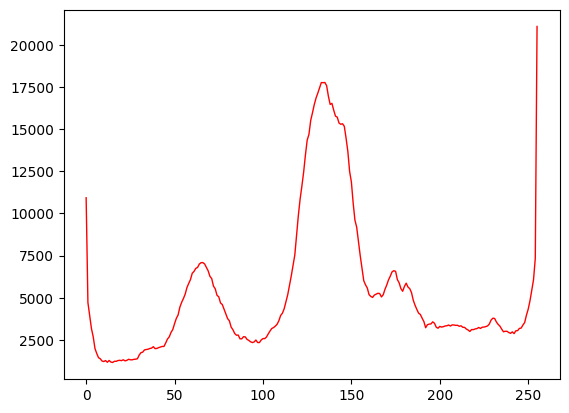

In [6]:
# 실제 영상에서 히스토그램 구하기
#import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('soccer.jpg')
h = cv.calcHist([img], [2], None, [256], [0, 256])      # 2채널(R channel)에서 히스토그램 계산
# (영상(이미지), 채널, 마스크(히스토그램을 계산할 영역), 히스토그램 크기(128일 경우 0, 1을 0으로 변환), 픽셀값 범위(128일 경우 128 이상의 값은 세지 않음))
plt.plot(h, color='r', linewidth=1)
plt.show()

In [7]:
# 오츄 알고리즘으로 이진화하기
#import cv2 as cv
#import sys

img = cv.imread('soccer.jpg')

t, bin_img = cv.threshold(img[:,:,2], 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
print('오츄 알고리즘이 찾은 최적 임계값 =', t)

cv.imshow('R channel', img[:,:,2])
cv.imshow('R channel binarization', bin_img)

cv.waitKey()
cv.destroyAllWindows()

오츄 알고리즘이 찾은 최적 임계값 = 113.0


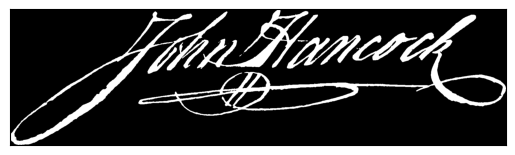

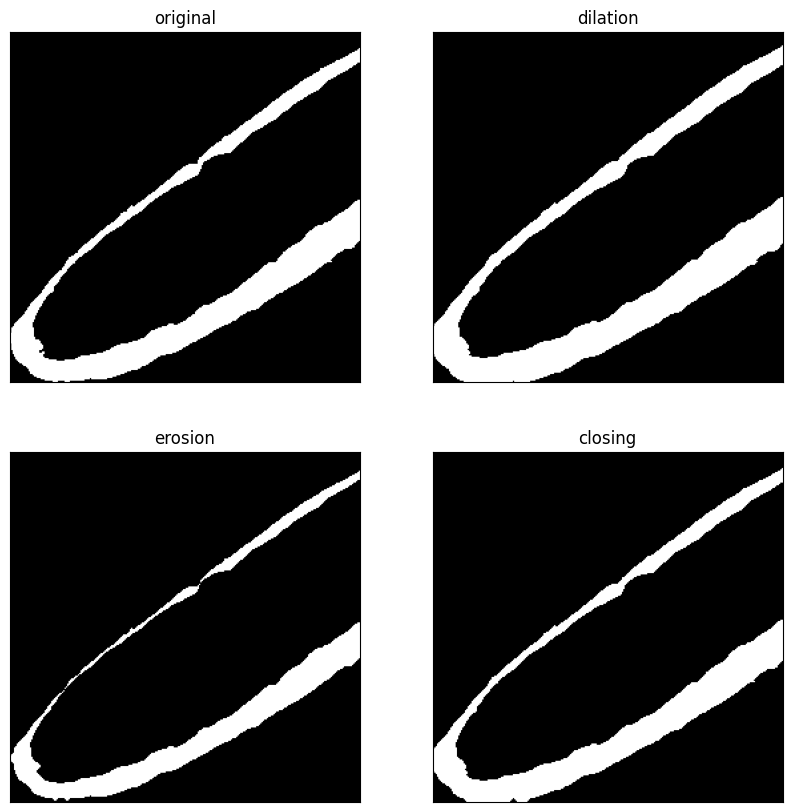

In [28]:
# 모폴로지 연산 적용하기
#import cv2 as cv
import numpy as np
#import matplotlib.pyplot as plt

img = cv.imread('JohnHancocksSignature.png', cv.IMREAD_UNCHANGED)

## 투명도 채널을 이진화하기(png는 투명도 채널이 있음)
t, bin_img = cv.threshold(img[:,:,3], 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(bin_img, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(10, 10))
b = bin_img[bin_img.shape[0]//2:bin_img.shape[0], 0:bin_img.shape[0]//2+1]
plt.subplot(221), plt.imshow(b, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title('original')

## 모폴로지 구조 요소 중 하나
se = np.uint8([[0,0,1,0,0],
               [0,1,1,1,0],
               [1,1,1,1,1],
               [0,1,1,1,0],
               [0,0,1,0,0]])

## 팽창 연산
b_dilation = cv.dilate(b, se, iterations=1)     # ieration: 반복 횟수
plt.subplot(222), plt.imshow(b_dilation, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title('dilation')

## 침식 연산
b_erosion = cv.erode(b, se, iterations=1)
plt.subplot(223), plt.imshow(b_erosion, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title('erosion')

## 닫힘(팽창한 결과에 침식을 적용) 연산
b_closing = cv.erode(cv.dilate(b, se, iterations=1), se, iterations=1)
plt.subplot(224), plt.imshow(b_closing, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title('closing')
plt.show()

# 점 연산

In [2]:
# 감마 보정 실험하기
import cv2 as cv
import numpy as np

img = cv.imread('soccer.jpg')
img = cv.resize(img, dsize=(0, 0), fx=0.25, fy=0.25)

def gamma(f, gamma=1.0):
    f1 = f/255.0        # L=256으로 가정
    return np.uint8(255*(f1**gamma))

gc = np.hstack((gamma(img, 0.5), gamma(img, 0.75), gamma(img, 1.0), gamma(img, 2.0), gamma(img, 3.0)))
cv.imshow('gamma', gc)

cv.waitKey()
cv.destroyAllWindows()

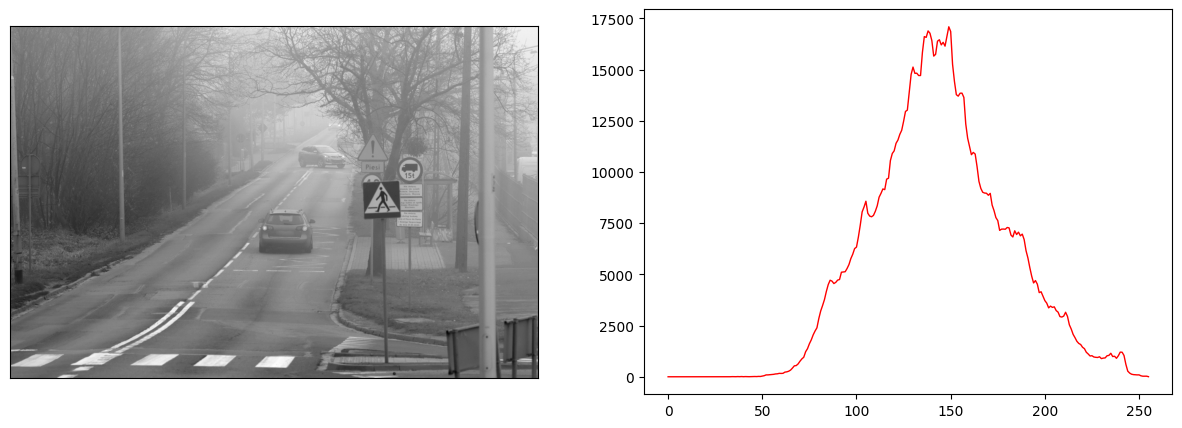

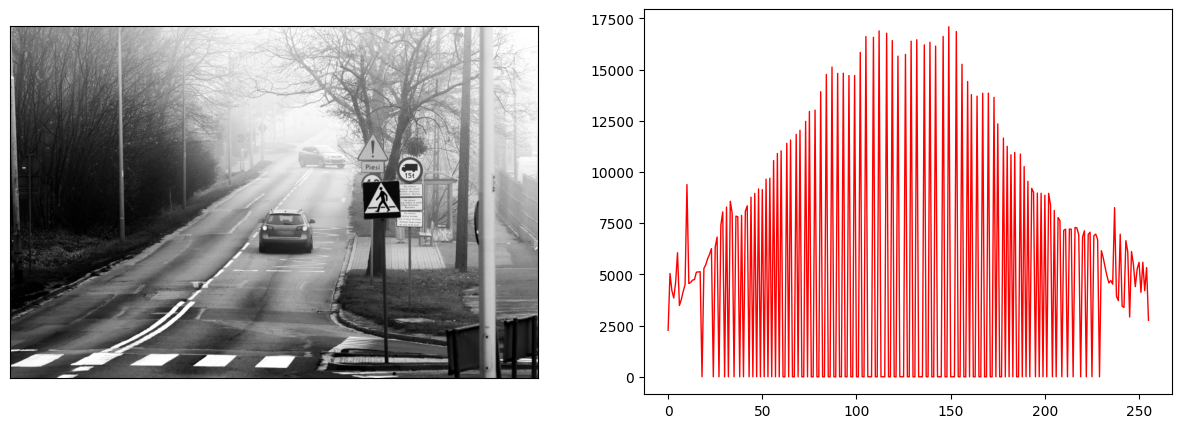

(<Axes: >, [<matplotlib.lines.Line2D at 0x222d1ebdac0>], None)

In [11]:
# 히스토그램 평활화하기
#import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('mistyroad.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)              # 명암 영상으로 변환하고 출력
plt.figure(figsize=(15, 5))
plt.subplot(121), plt.imshow(gray, cmap='gray'), plt.xticks([]), plt.yticks([])

h = cv.calcHist([gray], [0], None, [256], [0, 256])     # 히스토그램 계산
plt.subplot(122), plt.plot(h, color='r', linewidth=1), plt.show()

equal = cv.equalizeHist(gray)                           # 히스토그램 평활화
plt.figure(figsize=(15, 5))
plt.subplot(121), plt.imshow(equal, cmap='gray'), plt.xticks([]), plt.yticks([])

h = cv.calcHist([equal], [0], None, [256], [0, 256])    # 평활화된 히스토그램 계산
plt.subplot(122), plt.plot(h, color='r', linewidth=1), plt.show()

# 영역 연산

In [2]:
# 컨볼루션 적용(가우시안 스무딩과 엠보싱)하기
import cv2 as cv
import numpy as np

img = cv.imread('soccer.jpg')
img = cv.resize(img, dsize=(0, 0), fx=0.4, fy=0.4)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)                                              # 명암 영상으로 변환
cv.putText(gray, 'soccer', (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)    # 스무딩 효과를 확인하기 위해 사진에 글자 추가
cv.imshow('Original', gray)

smooth = np.hstack((cv.GaussianBlur(gray, (5, 5), 0.0),
                    cv.GaussianBlur(gray, (9, 9), 0.0),
                    cv.GaussianBlur(gray, (15,15), 0.0)))                   # 가우시안 스무딩
cv.imshow('Smooth', smooth)

femboss = np.array([[-1.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0],
                    [0.0, 0.0, 1.0]])                                       # 엠보싱 필터

gray16 = np.int16(gray)                                                   # 16비트 부동소수점으로 변환
emboss = np.uint8(np.clip(cv.filter2D(gray16,-1,femboss)+128, 0, 255))      # 엠보싱 필터 적용
emboss_bad = np.uint8(cv.filter2D(gray16,-1,femboss)+128)                   # 엠보싱 필터 적용(clip 없음)
emboss_worse = cv.filter2D(gray,-1,femboss)                               # 엠보싱 필터 적용(clip, +128 없음)

cv.imshow('Emboss', emboss)
cv.imshow('Emboss_bad', emboss_bad)
cv.imshow('Emboss_worse', emboss_worse)

cv.waitKey()
cv.destroyAllWindows()

# 기하 연산

In [6]:
# 보간을 이용해 영상의 기하 변환하기
#import cv2 as cv

img = cv.imread('rose.png')
patch = img[250:350, 170:270, :]        # 관심 영역 슬라이싱

img = cv.rectangle(img, (170, 250), (270, 350), (255, 0, 0), 3)    # 관심 영역에 사각형 그리기
patch1 = cv.resize(patch, dsize=(0, 0), fx=5, fy=5, interpolation=cv.INTER_NEAREST)    # 최근접 이웃 보간법
patch2 = cv.resize(patch, dsize=(0, 0), fx=5, fy=5, interpolation=cv.INTER_LINEAR)     # 양선형 보간법
patch3 = cv.resize(patch, dsize=(0, 0), fx=5, fy=5, interpolation=cv.INTER_CUBIC)      # 양3차 보간법

cv.imshow('Original', img)
cv.imshow('Resize nearest', patch1)
cv.imshow('Resize bilinear', patch2)
cv.imshow('Resize bicubic', patch3)

cv.waitKey()
cv.destroyAllWindows()

# OpenCV의 시간 효율

In [9]:
# 직접 작성한 함수와 OpenCV가 제공하는 함수의 시간 비교하기
import cv2 as cv
import numpy as np
import time

def my_cvtGray1(bgr_img):
    g = np.zeros([bgr_img.shape[0], bgr_img.shape[1]])
    for r in range(bgr_img.shape[0]):
        for c in range(bgr_img.shape[1]):
            g[r, c] = 0.114*bgr_img[r, c, 0] + 0.587*bgr_img[r, c, 1] + 0.299*bgr_img[r, c, 2]
    return np.uint8(g)

def my_cvtGray2(bgr_img):
    g = np.zeros([bgr_img.shape[0], bgr_img.shape[1]])
    g = 0.114*bgr_img[:,:,0] + 0.587*bgr_img[:,:,1] + 0.299*bgr_img[:,:,2]
    return np.uint8(g)

img = cv.imread('soccer.jpg')

start = time.time()
my_cvtGray1(img)
print('My time1:', time.time()-start)

start = time.time()
my_cvtGray2(img)
print('My time2:', time.time()-start)

start = time.time()
cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print('OpenCV time:', time.time()-start)

My time1: 7.235222101211548
My time2: 0.020178556442260742
OpenCV time: 0.0
